# Project 1 : Happiness and Wealth Data Analysis

This project is composed of 2 datasets : The word Economic Outlook (WEO) and the World Hapiness Report. 


The World Economic Outlook (WEO) database contains selected macroeconomic data series from the statistical appendix of the World Economic Outlook report, which presents the IMF staff's analysis and projections of economic developments at the global level, in major country groups and in many individual countries. The WEO is released in April and September/October each year.
Use this database to find data on national accounts, inflation, unemployment rates, balance of payments, fiscal indicators, trade for countries and commodity prices whose data are reported by the IMF. Data are available from 1980 to the present, and projections are given for the next two years. Additionally, medium-term projections are available for selected indicators. For some countries, data are incomplete or unavailable for certain years.

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012. The World Happiness 2022, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.
Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.



# Import & Cleaning Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Importing Data

In [9]:
#Import the IMF World Economic Report into a Data Frame named (named df_eco).
df_eco = pd.read_excel("World_Economic_Report_2022_.xlsx")

In [10]:
#Import the World Happiness Report into a Data Frame named (named df_happ).
df_happ = pd.read_csv("Word_Happiness_report_2022_.csv")

In [11]:
df_eco.head(5)

,ID_Num,Country,Region,IFM_Nigo,Step_Nego,Gov_Spending,Business_Freedom,Monetary_Freedom,Investment_Freedom,Population_Millions,GDP_Billions_PPP,Unemployment_Rate,Inflation_Rate,Public_Debt_rate_GDP
0,1,Afghanistan,Asia-Pacific,0.0,Step4,80.3,49.2,76.7,10.0,35.5,69.6,8.8,5.0,7.3
1,2,Albania,Europe,1.0,Step1,73.9,69.3,81.5,70.0,2.9,36.0,13.9,2.0,71.2
2,3,Algeria,Middle East and North Africa,0.0,Step4,48.7,61.6,74.9,30.0,41.5,632.9,10.0,5.6,25.8
3,4,Angola,Sub-Saharan Africa,0.0,Step4,80.7,55.7,55.4,30.0,28.2,190.3,8.2,31.7,65.3
4,5,Argentina,Americas,0.0,Step2,49.5,56.4,60.2,55.0,44.1,920.2,8.7,25.7,52.6


In [12]:
df_happ.head(5)

,Unnamed: 0,index,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Cleaning data

Cleaning df_eco

In [13]:
df_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Num                174 non-null    int64  
 1   Country               174 non-null    object 
 2   Region                174 non-null    object 
 3   IFM_Nigo              172 non-null    float64
 4   Step_Nego             171 non-null    object 
 5   Gov_Spending          172 non-null    float64
 6   Business_Freedom      173 non-null    float64
 7   Monetary_Freedom      173 non-null    float64
 8   Investment_Freedom    173 non-null    float64
 9   Population_Millions   174 non-null    float64
 10  GDP_Billions_PPP      174 non-null    float64
 11  Unemployment_Rate     173 non-null    float64
 12  Inflation_Rate        173 non-null    float64
 13  Public_Debt_rate_GDP  174 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 19.2+ KB


In [14]:
df_eco.isnull().sum()

ID_Num                  0
Country                 0
Region                  0
IFM_Nigo                2
Step_Nego               3
Gov_Spending            2
Business_Freedom        1
Monetary_Freedom        1
Investment_Freedom      1
Population_Millions     0
GDP_Billions_PPP        0
Unemployment_Rate       1
Inflation_Rate          1
Public_Debt_rate_GDP    0
dtype: int64

In [15]:
df_eco[['IFM_Nigo', 'Step_Nego', 'Gov_Spending', 'Business_Freedom', 'Monetary_Freedom', 'Investment_Freedom', 'Unemployment_Rate', 'Inflation_Rate' ]]

,IFM_Nigo,Step_Nego,Gov_Spending,Business_Freedom,Monetary_Freedom,Investment_Freedom,Unemployment_Rate,Inflation_Rate
0,0.0,Step4,80.3,49.2,76.7,10.0,8.8,5.0
1,1.0,Step1,73.9,69.3,81.5,70.0,13.9,2.0
2,0.0,Step4,48.7,61.6,74.9,30.0,10.0,5.6
3,0.0,Step4,80.7,55.7,55.4,30.0,8.2,31.7
4,0.0,Step2,49.5,56.4,60.2,55.0,8.7,25.7
...,...,...,...,...,...,...,...,...
169,0.0,Step1,54.1,52.4,75.0,65.0,5.2,3.1
170,0.0,Step2,58.1,33.9,10.0,2.0,7.7,1087.5
171,0.0,Step2,74.1,63.5,68.9,30.0,2.1,3.5
172,0.0,Step4,80.1,71.1,70.3,55.0,7.8,6.6


In [16]:
quanti = ['Gov_Spending', 'Business_Freedom', 'Monetary_Freedom', 'Investment_Freedom', 'Unemployment_Rate', 'Inflation_Rate']
quanti

['Gov_Spending',
 'Business_Freedom',
 'Monetary_Freedom',
 'Investment_Freedom',
 'Unemployment_Rate',
 'Inflation_Rate']

In [17]:
quali = ['IFM_Nigo', 'Step_Nego']
quali

['IFM_Nigo', 'Step_Nego']

In [18]:
df_eco['IFM_Nigo'].value_counts()

IFM_Nigo
1.0    87
0.0    85
Name: count, dtype: int64

For quantitative variable, missing values will be replaced by the mean per Region. 

In [19]:
df_eco[quanti] = df_eco[quanti].fillna(df_eco.groupby('Region')[quanti].transform('mean'))
df_eco[quanti].isnull().sum()

Gov_Spending          0
Business_Freedom      0
Monetary_Freedom      0
Investment_Freedom    0
Unemployment_Rate     0
Inflation_Rate        0
dtype: int64

For qualitative variable, we will replaced the missing values by the mode.

Let's replace Step_Nego by the mode

In [20]:
df_eco['Step_Nego'] = df_eco['Step_Nego'].fillna(df_eco['Step_Nego'].mode()[0])
df_eco['Step_Nego'].isnull().sum()

0

In [21]:
df_eco['IFM_Nigo'] = df_eco['IFM_Nigo'].fillna(df_eco['IFM_Nigo'].mode()[0])
df_eco['IFM_Nigo'].isnull().sum()


0

In [22]:
df_eco.isnull().sum()

ID_Num                  0
Country                 0
Region                  0
IFM_Nigo                0
Step_Nego               0
Gov_Spending            0
Business_Freedom        0
Monetary_Freedom        0
Investment_Freedom      0
Population_Millions     0
GDP_Billions_PPP        0
Unemployment_Rate       0
Inflation_Rate          0
Public_Debt_rate_GDP    0
dtype: int64

Cleaning Happiness

In [23]:
df_happ.head()

,Unnamed: 0,index,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [24]:
df_happ.isnull().sum()

Unnamed: 0                      0
index                           0
Overall rank                    0
Country                         0
Score                           0
GDP per capita                  1
Social support                  0
Healthy life expectancy         4
Freedom to make life choices    0
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [25]:
quanti = ['GDP per capita', 'Healthy life expectancy','Generosity','Perceptions of corruption']

In [26]:
df_happ[quanti] = df_happ[quanti].fillna(df_happ[quanti].apply('mean'))
df_happ[quanti].isnull().sum()

GDP per capita               0
Healthy life expectancy      0
Generosity                   0
Perceptions of corruption    0
dtype: int64

# Data Manipulation

## Merging both Dataframe


#### 1. The data frame called "df" should contain the fusion of both economic and happiness reports for countries that are common between df_eco and df_happ.

In [27]:
df = df_eco.merge(df_happ, how = 'inner' , on ='Country')
df.shape

(137, 24)

## Data Manipulation

#### 1. Use the loop (for...in...) to print: the Minimum of " Unemployment_Rate & Inflation_Rate" by ‘Region’

In [28]:
for reg in df_eco['Region'].unique():
    region_data = df[df['Region'] == reg]
    unemployement = region_data['Unemployment_Rate'].min()
    Inflation = region_data['Inflation_Rate'].min()  
    print("Region : "  + reg)
    print("Minimum Unemployement : "  + str(unemployement))
    print("Minimum inflation : " + str(Inflation))
    print("----------")

Region : Asia-Pacific
Minimum Unemployement : 0.2
Minimum inflation : 0.5
----------
Region : Europe
Minimum Unemployement : 0.5
Minimum inflation : 0.3
----------
Region : Middle East and North Africa
Minimum Unemployement : 0.1
Minimum inflation : -0.9
----------
Region : Sub-Saharan Africa
Minimum Unemployement : 0.4
Minimum inflation : -0.9
----------
Region : Americas
Minimum Unemployement : 2.7
Minimum inflation : 0.4
----------


# Data Visualization

The Bar chart of the average of 'Unemployment_Rate' & max of 'Inflation_Rate' by ‘Region’

In [29]:
table = pd.pivot_table(df, index = 'Region', values = 'Unemployment_Rate', aggfunc = 'mean')
table_1 = pd.pivot_table(df, index = 'Region', values = 'Inflation_Rate', aggfunc = 'max')
table_final = table.merge(table_1, right_on = 'Region', left_on = "Region")
table_final = table_final.reset_index()

As Americas have a huge inflation rate, putting it in the graph will let the other variable too small
to be easily read

Text(0.5, 1.0, 'Average Unemployment Rate and Maximum inflation Rate in USA')

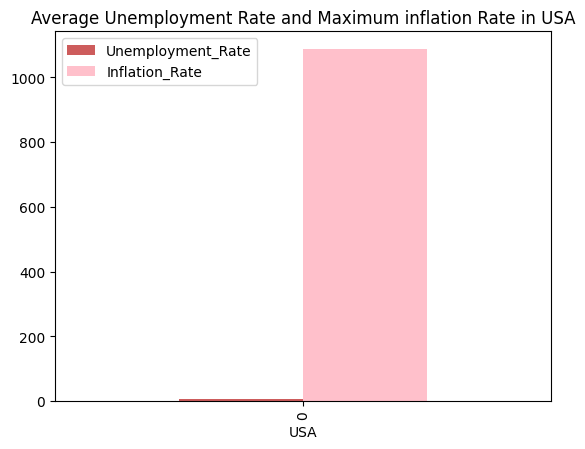

In [30]:
crit = table_final['Region'] == 'Americas'
USA = table_final[crit]
USA.plot(kind = 'bar', color = ['indianred','pink'])
plt.xlabel('USA')
plt.title("Average Unemployment Rate and Maximum inflation Rate in USA")

Text(0.5, 1.0, 'Average Unemployment Rate and Maximum inflation Rate per Region')

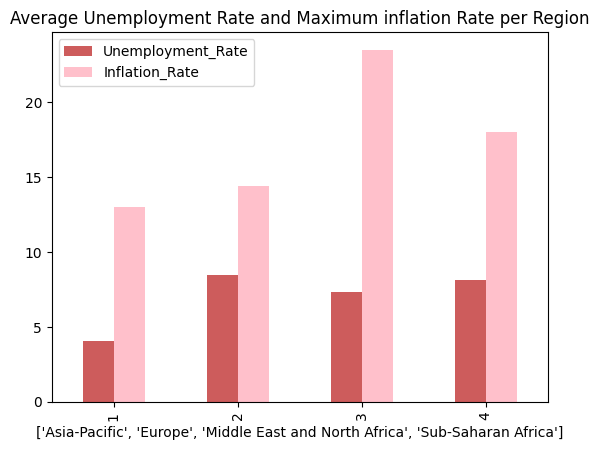

In [31]:
no_USA = table_final.drop(index = 0)
list_country = no_USA['Region'].tolist()
no_USA.plot(kind = 'bar', color = ['indianred','pink'])
plt.xlabel(list_country)
plt.title("Average Unemployment Rate and Maximum inflation Rate per Region")

Read the maximum of ' 'Gov_Spending 'by ‘ Step-Nego ‘ and show it using a Pie chart

In [32]:
df_1 = df.groupby('Step_Nego')['Gov_Spending'].apply('max')
print(df_1)
y = df_1.array

Step_Nego
Step1    95.6
Step2    91.4
Step3    92.0
Step4    96.5
Name: Gov_Spending, dtype: float64


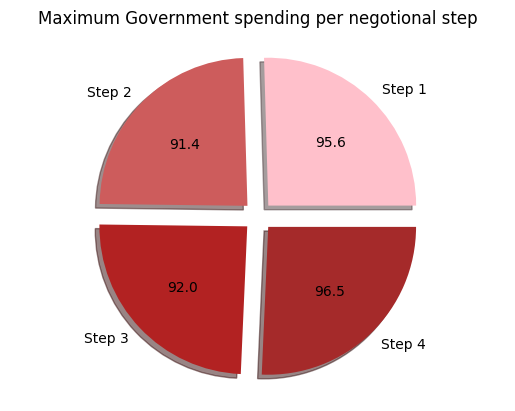

In [33]:
def absolute_value(val):
    a  = np.round(val/100.*y.sum(), 1)
    return a

plt.axis("equal")
plt.pie(y, labels = ['Step 1', 'Step 2', 'Step 3', 'Step 4'], normalize = True, 
        explode=(0.1, 0.1, 0.1, 0.1), shadow=True, autopct=absolute_value,  
        colors = ['pink', 'indianred', 'firebrick', 'brown'])
plt.title('Maximum Government spending per negotional step')
plt.show()


Read the “'Public_Debt_rate_GDP'” of each country and show it using the histogram to see five ranges

In [34]:
df_1 = df.groupby('Region')['Public_Debt_rate_GDP'].describe()

Text(0.5, 1.0, 'Public Debt Rate per GDP information per Region')

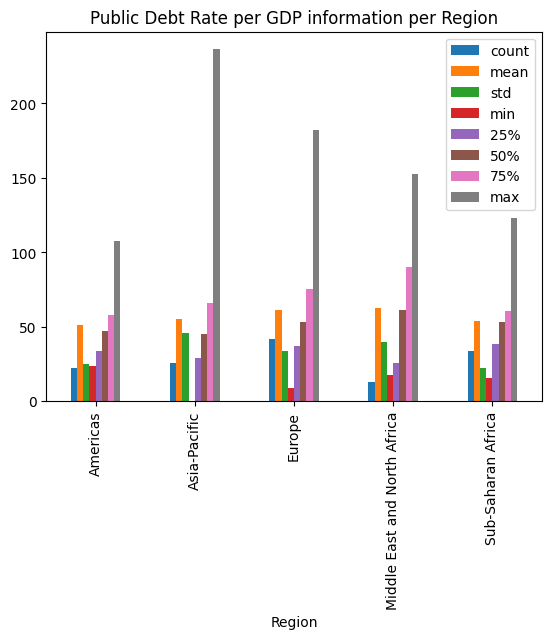

In [35]:
df_1.plot(kind = 'bar')
plt.title("Public Debt Rate per GDP information per Region")

# Machine Learning Models

## Supervised Machine Learning

Let's first make qualitative variable into quantitive variable !

In [36]:
#Only region need to be encode as it is more precise than Country
le = LabelEncoder()
dict_columns = {}

df['Region'] = pd.Series(le.fit_transform(df['Region'][df['Region'].notnull()]))
dict_columns['Region'] = dict(zip(le.classes_, range(len(le.classes_))))

In [37]:
le = LabelEncoder()
dict_columns = {}

df['Step_Nego'] = pd.Series(le.fit_transform(df['Region'][df['Region'].notnull()]))
dict_columns['Step_Nego'] = dict(zip(le.classes_, range(len(le.classes_))))

df_encode = df.drop(columns = ['Country', 'ID_Num', 'index', 'index', 'Unnamed: 0'])

In [38]:
df_encode.columns

Index(['Region', 'IFM_Nigo', 'Step_Nego', 'Gov_Spending', 'Business_Freedom',
       'Monetary_Freedom', 'Investment_Freedom', 'Population_Millions',
       'GDP_Billions_PPP', 'Unemployment_Rate', 'Inflation_Rate',
       'Public_Debt_rate_GDP', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [39]:
df_happ.columns

Index(['Unnamed: 0', 'index', 'Overall rank', 'Country', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Let's first see if there is any correlation between IMF_Nigo and other variable thanks to a correlation matrix

As the matrix will be huge, Let's split it in half

In [40]:
matrix_eco = df_encode[['Region', 'IFM_Nigo', 'Step_Nego', 'Gov_Spending', 'Business_Freedom',
       'Monetary_Freedom', 'Investment_Freedom', 'Population_Millions',
       'GDP_Billions_PPP', 'Unemployment_Rate', 'Inflation_Rate',
       'Public_Debt_rate_GDP']]
matrix_happ = df_encode[['Region','IFM_Nigo', 'Overall rank', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

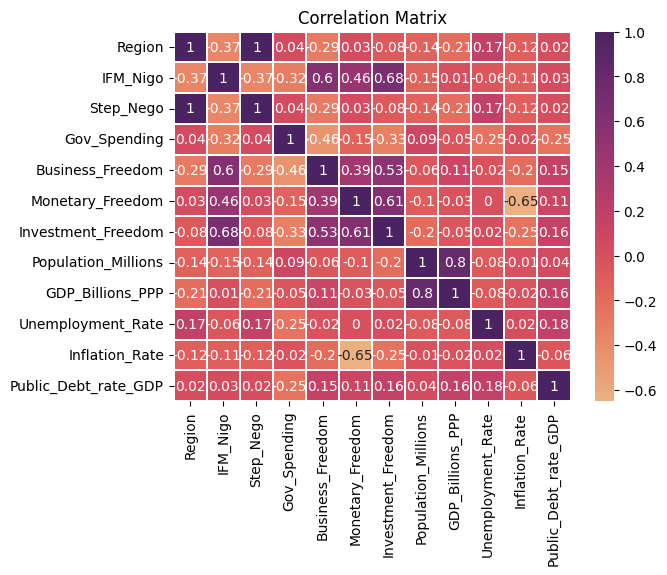

In [41]:
sns.heatmap(round(matrix_eco.corr(), 2), cmap = 'flare', annot = True,  linewidth = 0.1)
plt.title('Correlation Matrix')
plt.show()

The economic variable chosen to predict IMF_Nigo will be Investment_Freedom. 
Indeed, on the line of IFM_Nego in the matrix related to economical features, IFM_Nigo and Investment_Freedom have a coefficient of correlation of 0.68 which is the more relevant. 

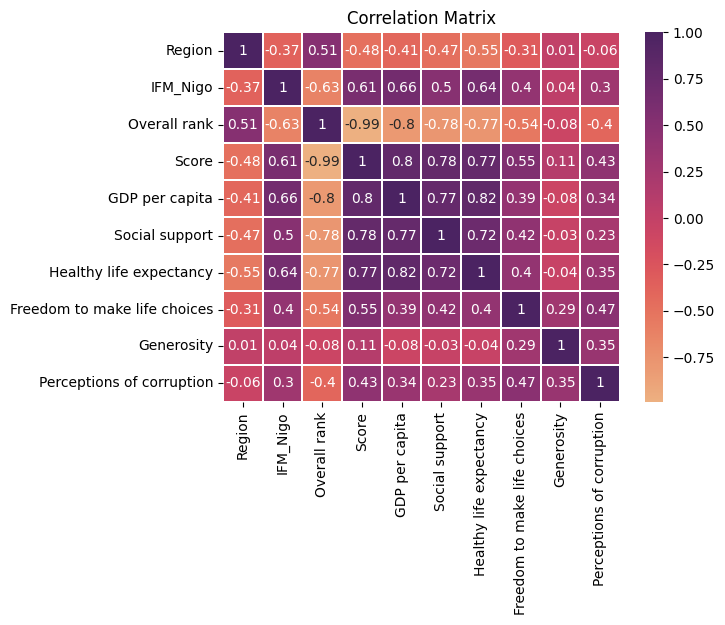

In [42]:
sns.heatmap(round(matrix_happ.corr(), 2), cmap = 'flare', annot = True,  linewidth = 0.1)
plt.title('Correlation Matrix')
plt.show()

The hapiness variable chosen to predict IMF_Nigo will be GDP per capita. 
Indeed, on the line of IFM_Nego in the matrix related to hapiness features, IFM_Nigo and GDP per capit have a coefficient of correlation of 0.66 which the most relevant (followed by 'Overall rank' with -0,63 and 'Score' with 0,61) 

So, for the Supervised machine learning we will use investment_Freedom as an Economic variables and GDP per capita as a Hapiness Variable.

As we have to predict IMF_Nigo which is a binary variable. We can use Logistic Linear Regression or Random Forest.

In [43]:
df_encode.columns

Index(['Region', 'IFM_Nigo', 'Step_Nego', 'Gov_Spending', 'Business_Freedom',
       'Monetary_Freedom', 'Investment_Freedom', 'Population_Millions',
       'GDP_Billions_PPP', 'Unemployment_Rate', 'Inflation_Rate',
       'Public_Debt_rate_GDP', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [44]:
Model = df_encode[['GDP per capita', 'Investment_Freedom', 'IFM_Nigo']]

In [45]:
Model

,GDP per capita,Investment_Freedom,IFM_Nigo
0,0.350,10.0,0.0
1,0.947,70.0,1.0
2,1.002,30.0,0.0
3,1.092,55.0,0.0
4,0.850,75.0,1.0
...,...,...,...
132,0.745,10.0,0.0
133,0.960,2.0,0.0
134,0.741,30.0,0.0
135,0.578,55.0,0.0


Let's split the data 

In [46]:
X = Model.drop(columns = 'IFM_Nigo')
Y = Model['IFM_Nigo']

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [48]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

print('Intercept: \n', logistic_regression.intercept_)
print('Coefficients: \n', logistic_regression.coef_)

Intercept: 
 [-8.72474677]
Coefficients: 
 [[2.46617466 0.10812223]]


<Axes: xlabel='Predicted', ylabel='Actual'>

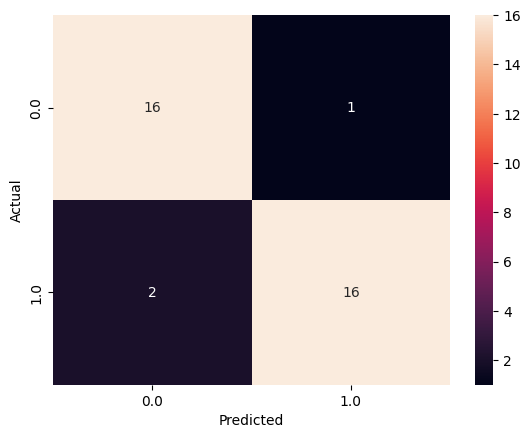

In [49]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [50]:
# Let's see other indicators
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

accuracy, precision, recall

(0.9142857142857143, 0.9411764705882353, 0.8888888888888888)

So we have an accuracy of 91% which is good ! 
For the coefficient we have 2.46 for GDP per capita and 0.10 for Investment freedom which mean that GDP per capita influence more the result than Investment freedom.
The intercept is -8. 

As for the confusion matrix, we have 16 True positive ( out of the 18 '0', 16 were rigthly predicted) and 16 True Negative (out of the 18 '1', 16 were rightly predicted).

## b) Unsupervised Machine Learning (20 points)

To segment countries worldwide based on their economic development and happiness ranking, the data scientist suggests conducting a cluster analysis using an
unsupervised machine learning model (KMeans).

Two variables were provided for this analysis :

Variables: Gov_spending and Generosity   

Cluster Number : n_opitmal value

Let's first prepare the database for the Machine Learning

In [51]:
Model_1 = df[['Gov_Spending', 'Generosity']]
Model_1

,Gov_Spending,Generosity
0,80.300000,0.158
1,73.900000,0.178
2,48.700000,0.073
3,49.500000,0.066
4,45.211905,0.095
...,...,...
132,67.400000,0.322
133,58.100000,0.064
134,74.100000,0.147
135,80.100000,0.247


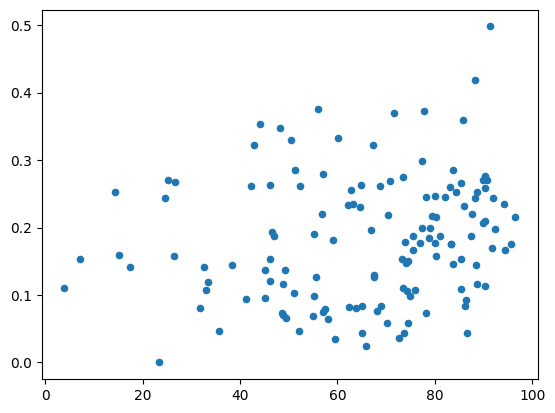

In [52]:
plt.scatter(Model_1["Gov_Spending"], Model_1['Generosity'], s=20)  # Graphical representation

Get optimal number of cluster

In [53]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Model_1)
    distortions.append(kmeanModel.inertia_)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

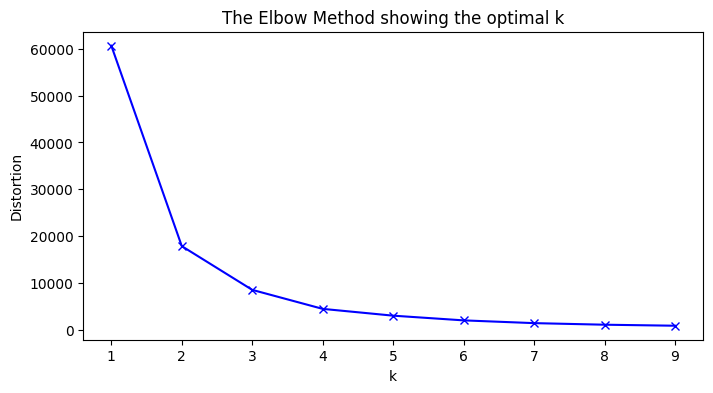

In [54]:
    plt.figure(figsize=(8,4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

So 3 is the optimal number of cluster

Inertia:  8551.719429956378


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


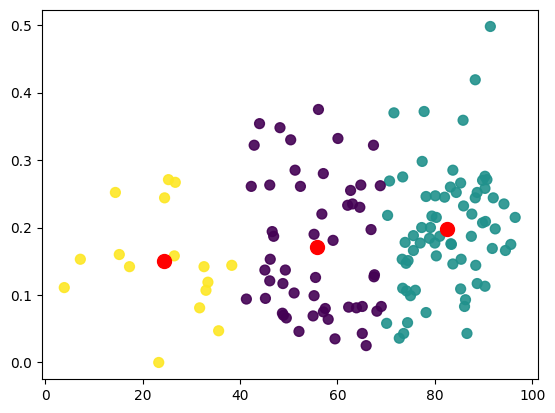

In [55]:
kmeans = KMeans(n_clusters=3).fit(Model_1)
centroids = kmeans.cluster_centers_
print('Inertia: ', kmeans.inertia_)

plt.scatter(df['Gov_Spending'], df['Generosity'], c= kmeans.labels_.astype(int), s=50, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100);

In [56]:
c= kmeans.labels_.astype(int)
c 

array([1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1,
       1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1])

In [57]:
Model_1['Cluster'] = c

/var/folders/36/wl8qpzsj1r751n66z616fxsm0000gn/T/ipykernel_6195/3378026438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_1['Cluster'] = c


In [58]:
# Get the summary of each cluster

for i in Model_1['Cluster'].unique() : 
    info = Model_1[Model_1['Cluster'] == i][["Gov_Spending", "Generosity"]].describe()
    print("Cluster :" + str(i))
    print(" ")
    print(info)
    print(" ")
    print('****************************************************')
    print(" ")

Cluster :1
 
       Gov_Spending  Generosity
count     69.000000   69.000000
mean      82.540580    0.197812
std        7.147445    0.088661
min       70.100000    0.036000
25%       76.000000    0.147000
50%       83.300000    0.188000
75%       88.400000    0.247000
max       96.500000    0.498000
 
****************************************************
 
Cluster :0
 
       Gov_Spending  Generosity
count     52.000000   52.000000
mean      55.780998    0.170577
std        8.307649    0.100006
min       41.300000    0.025000
25%       48.775000    0.081750
50%       55.800000    0.137000
75%       63.300000    0.261000
max       69.000000    0.375000
 
****************************************************
 
Cluster :2
 
       Gov_Spending  Generosity
count     16.000000   16.000000
mean      24.306250    0.149875
std       10.187801    0.077506
min        3.900000    0.000000
25%       16.775000    0.110000
50%       25.900000    0.143000
75%       32.700000    0.181000
max       38.30

<Axes: title={'center': 'Gov_Spending'}, xlabel='Cluster'>

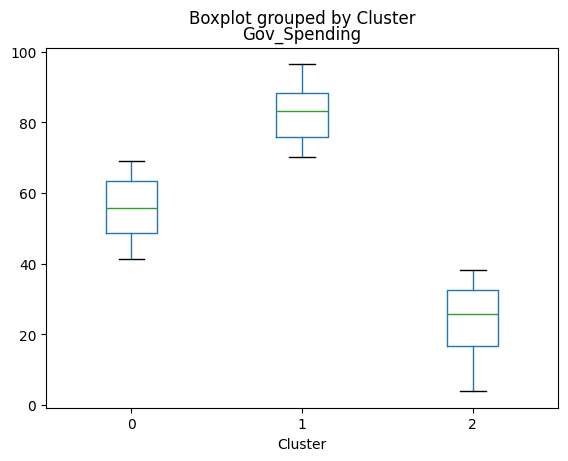

In [59]:
Model_1.boxplot(by = "Cluster", column ='Gov_Spending', grid = False)

<Axes: title={'center': 'Generosity'}, xlabel='Cluster'>

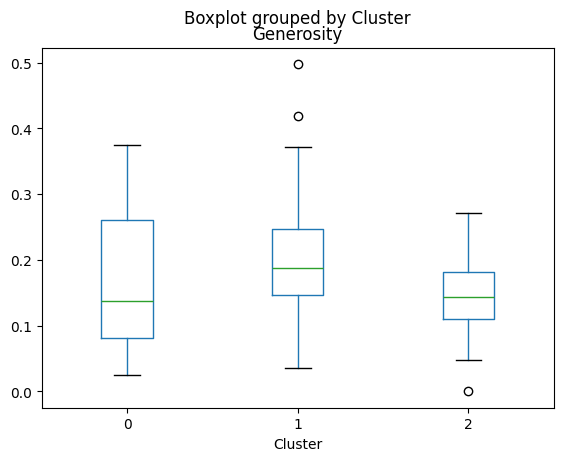

In [60]:
Model_1.boxplot(by = "Cluster", column ='Generosity', grid = False)

There is a total of 3 clusters. 
Thanks to the Boxplots, we understand that cluster mainly differentiate by their Government spending. (Mean of Cluster 1 : 82,54, Mean of Cluster 2 : 55, 78 and Cluster 0 : 24,30). 
The standard deviation of their government spending is between 8 and 10.

Regarding the Generosity variable, there is some outliers. 